In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

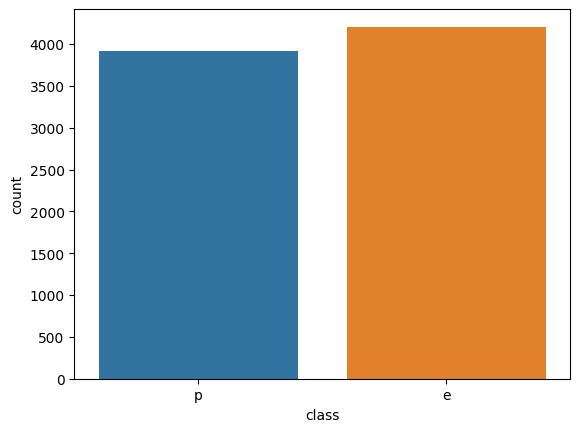

In [6]:
sns.countplot(data=df, x='class', hue='class')

In [33]:
uni_date = df.describe().iloc[1].sort_values()

C:\Users\Maksim\AppData\Local\Temp\ipykernel_5604\2048906723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni_date, palette='Dark2')


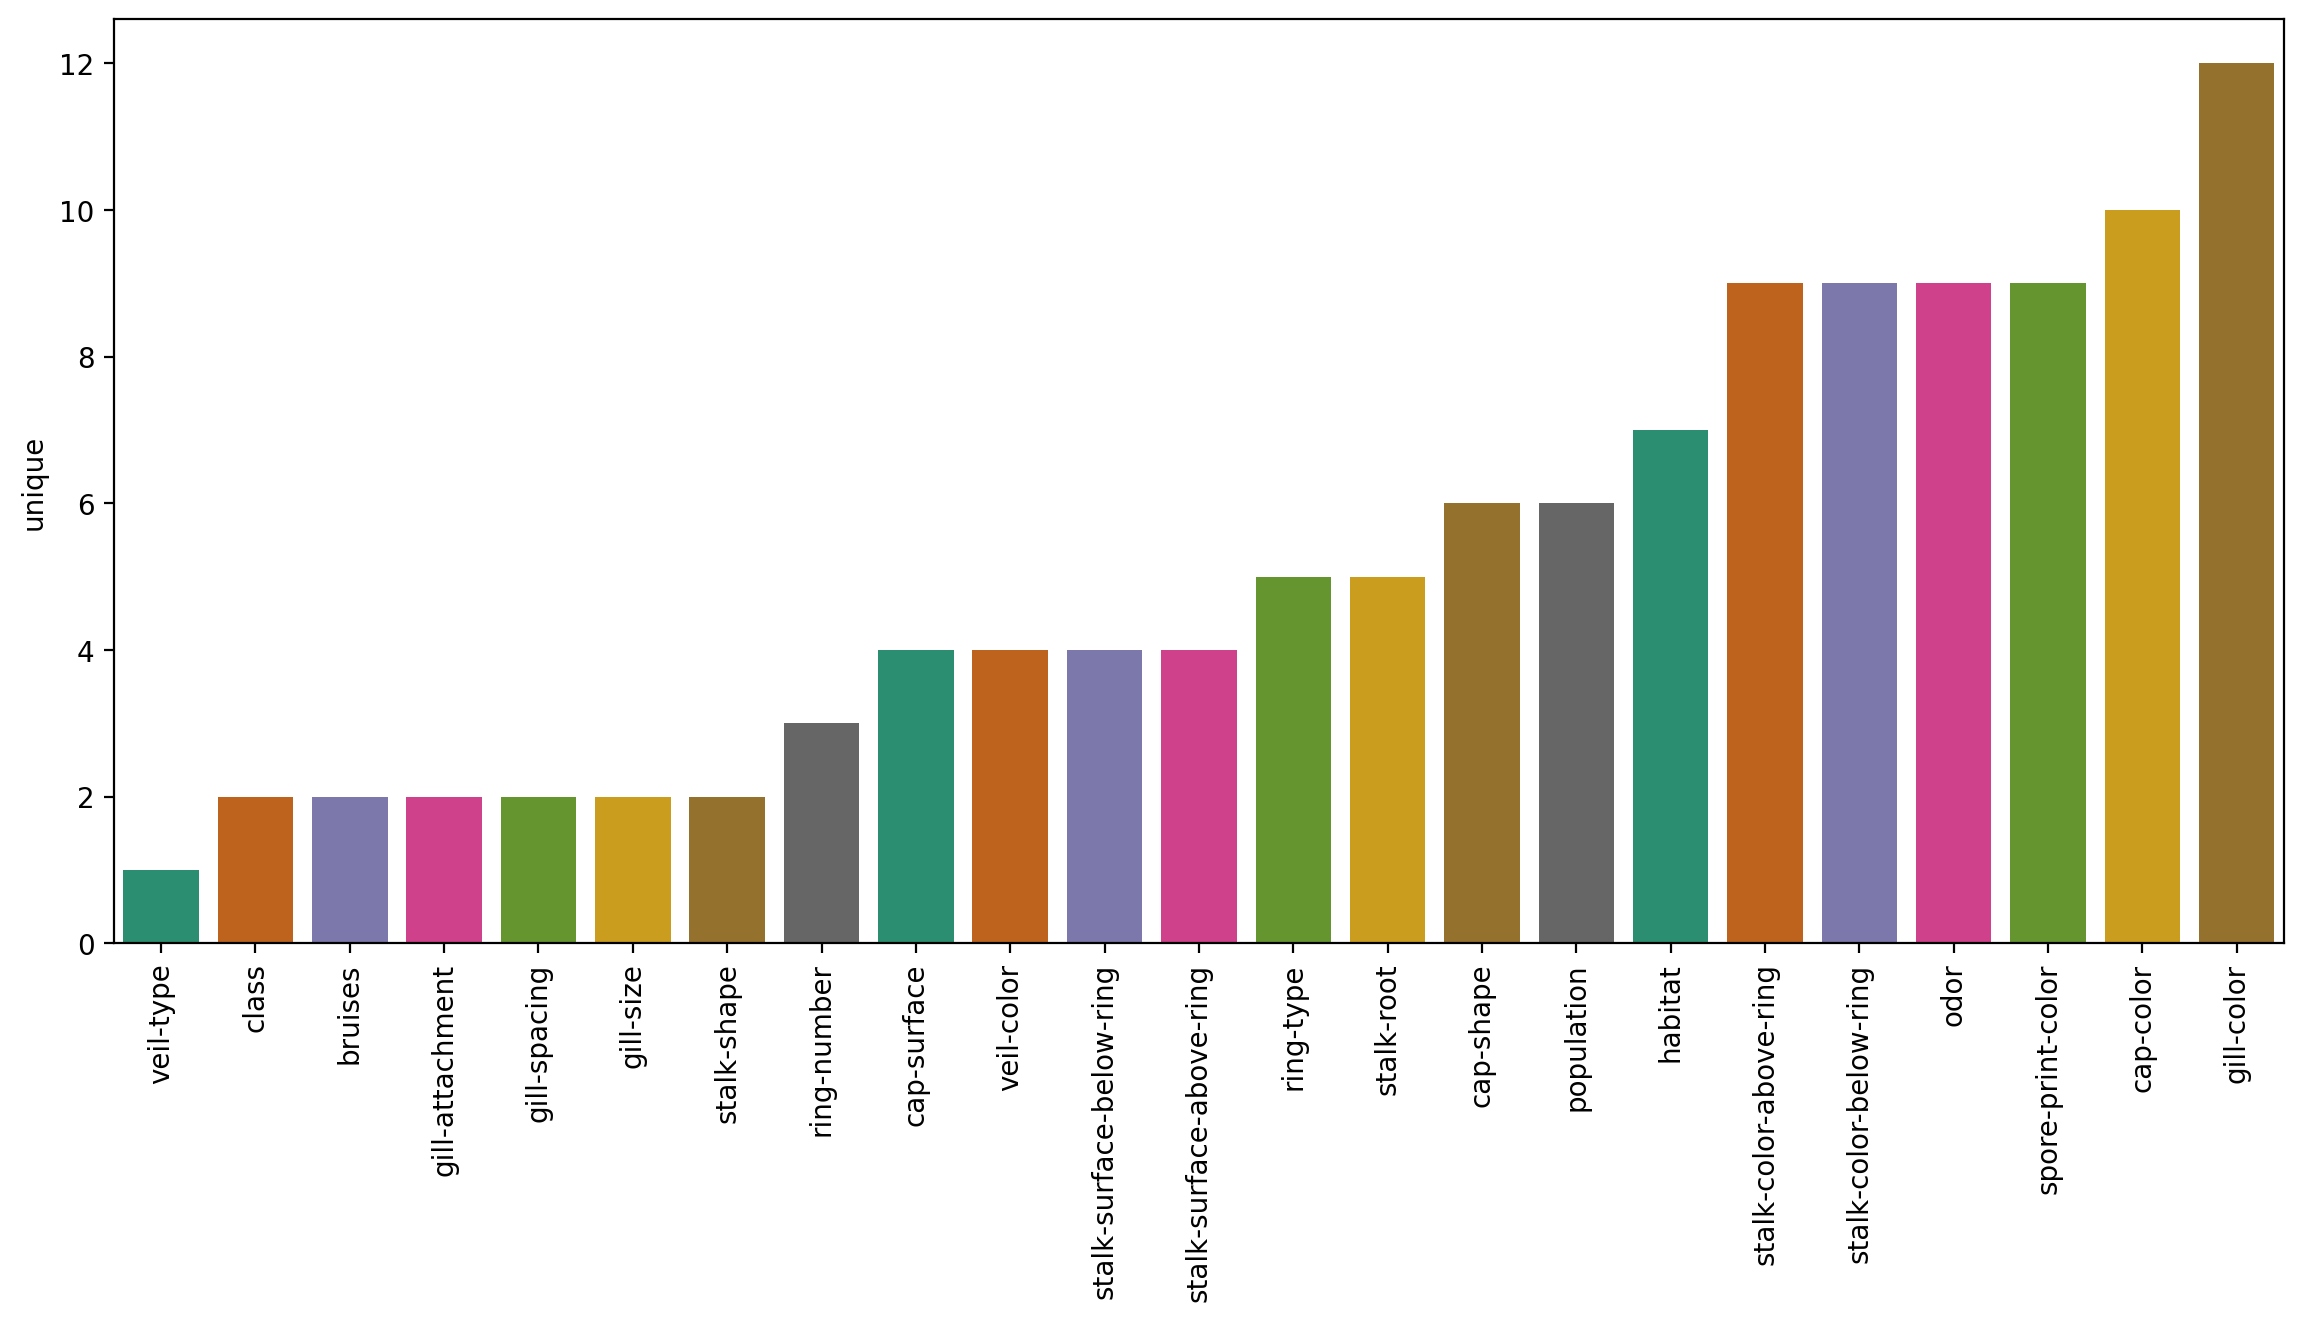

In [34]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=uni_date, palette='Dark2')
plt.xticks(rotation=90);

In [38]:
X = df.drop('class', axis=1)
y = df['class']

In [39]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [ ]:
#Адаптивный бустинг

In [44]:
model = AdaBoostClassifier(n_estimators=1) #Самая простая модель с 1 деревом

In [45]:
model.fit(X_train, y_train)

C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [47]:
y_predict = model.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [50]:
model.feature_importances_.argmax() #Мы получили единственный важный признак, его индекс = 22

np.int64(22)

In [51]:
X.columns[22] #Самый верный признак ядовитости гриба - наличие запаха

'odor_n'

In [52]:
error_rates = []
for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_predict)
    error_rates.append(err)

C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

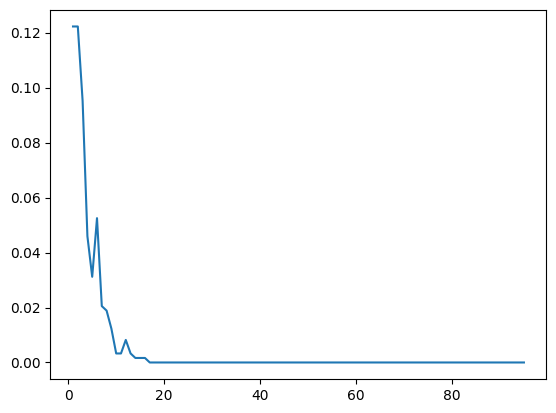

In [53]:
plt.plot(range(1,96), error_rates) #Ошибка перестает сильно изменяться после увеличения до 20 деревьев

In [57]:
feats = pd.DataFrame(data=model.feature_importances_,
                     index=X.columns,
                     columns=['Важность'])

In [60]:
imp_feats = feats[feats['Важность'] > 0].sort_values('Важность')

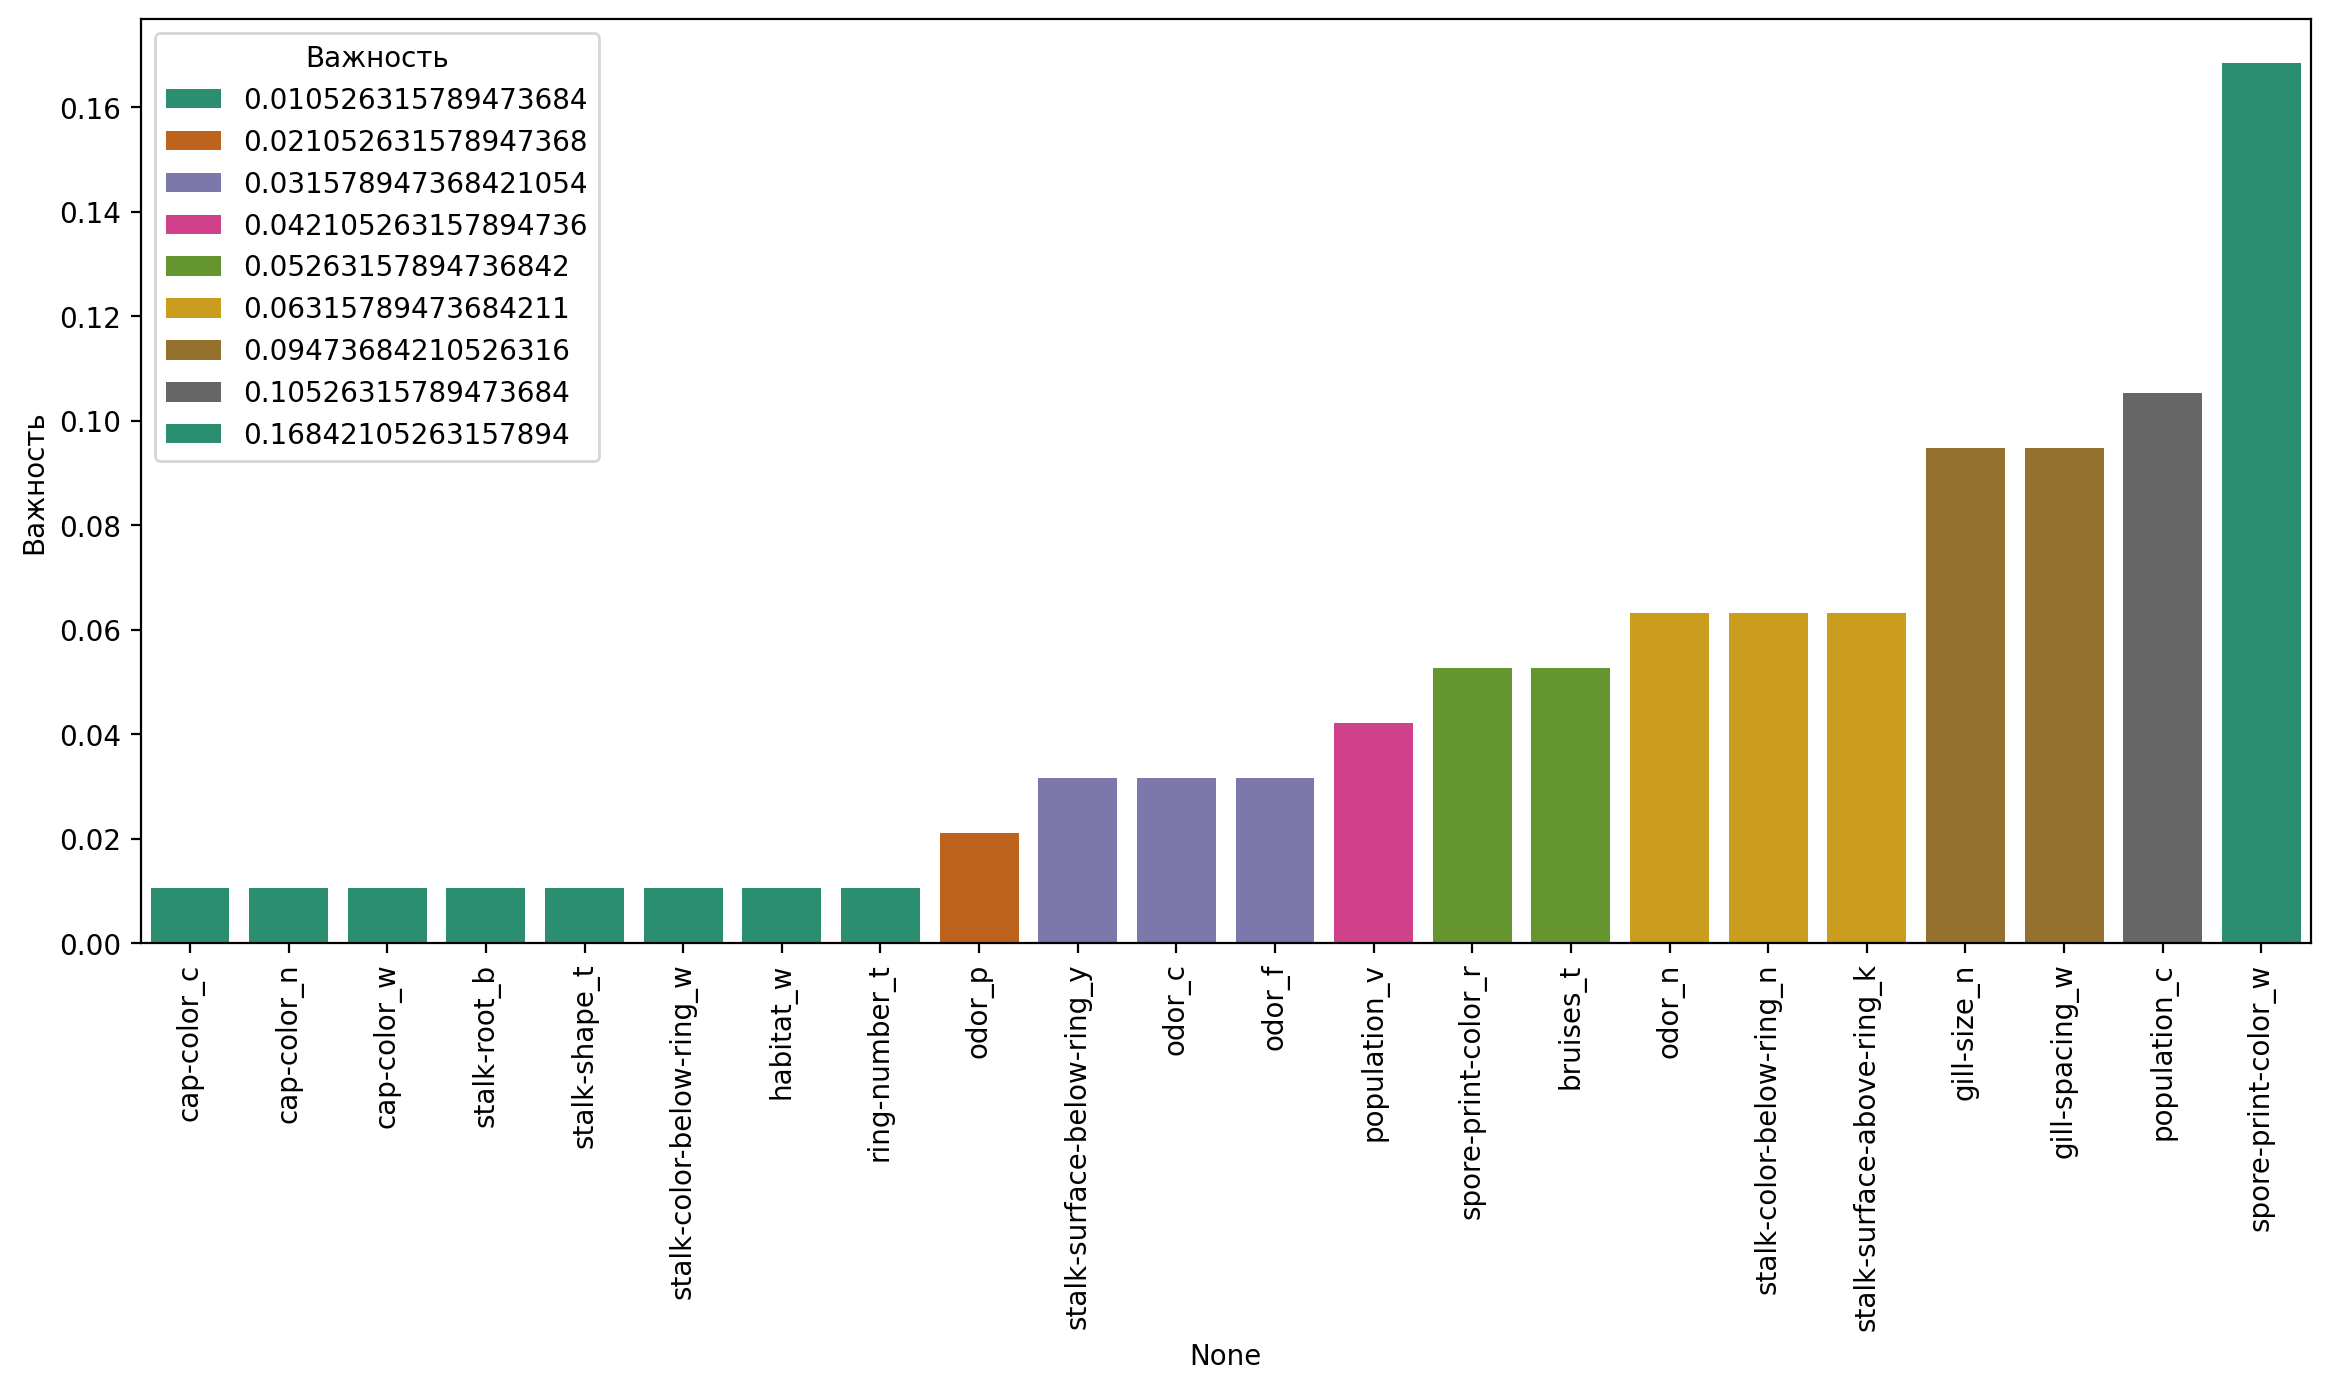

In [63]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Важность', hue='Важность', palette='Dark2')
plt.xticks(rotation=90);

In [64]:
model = AdaBoostClassifier(n_estimators=20)

In [65]:
model.fit(X_train, y_train)

C:\Users\Maksim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=20)

In [66]:
y_predict = model.predict(X_test)

In [67]:
feats = pd.DataFrame(data=model.feature_importances_,
                     index=X.columns,
                     columns=['Важность'])

In [68]:
imp_feats = feats[feats['Важность'] > 0].sort_values('Важность')

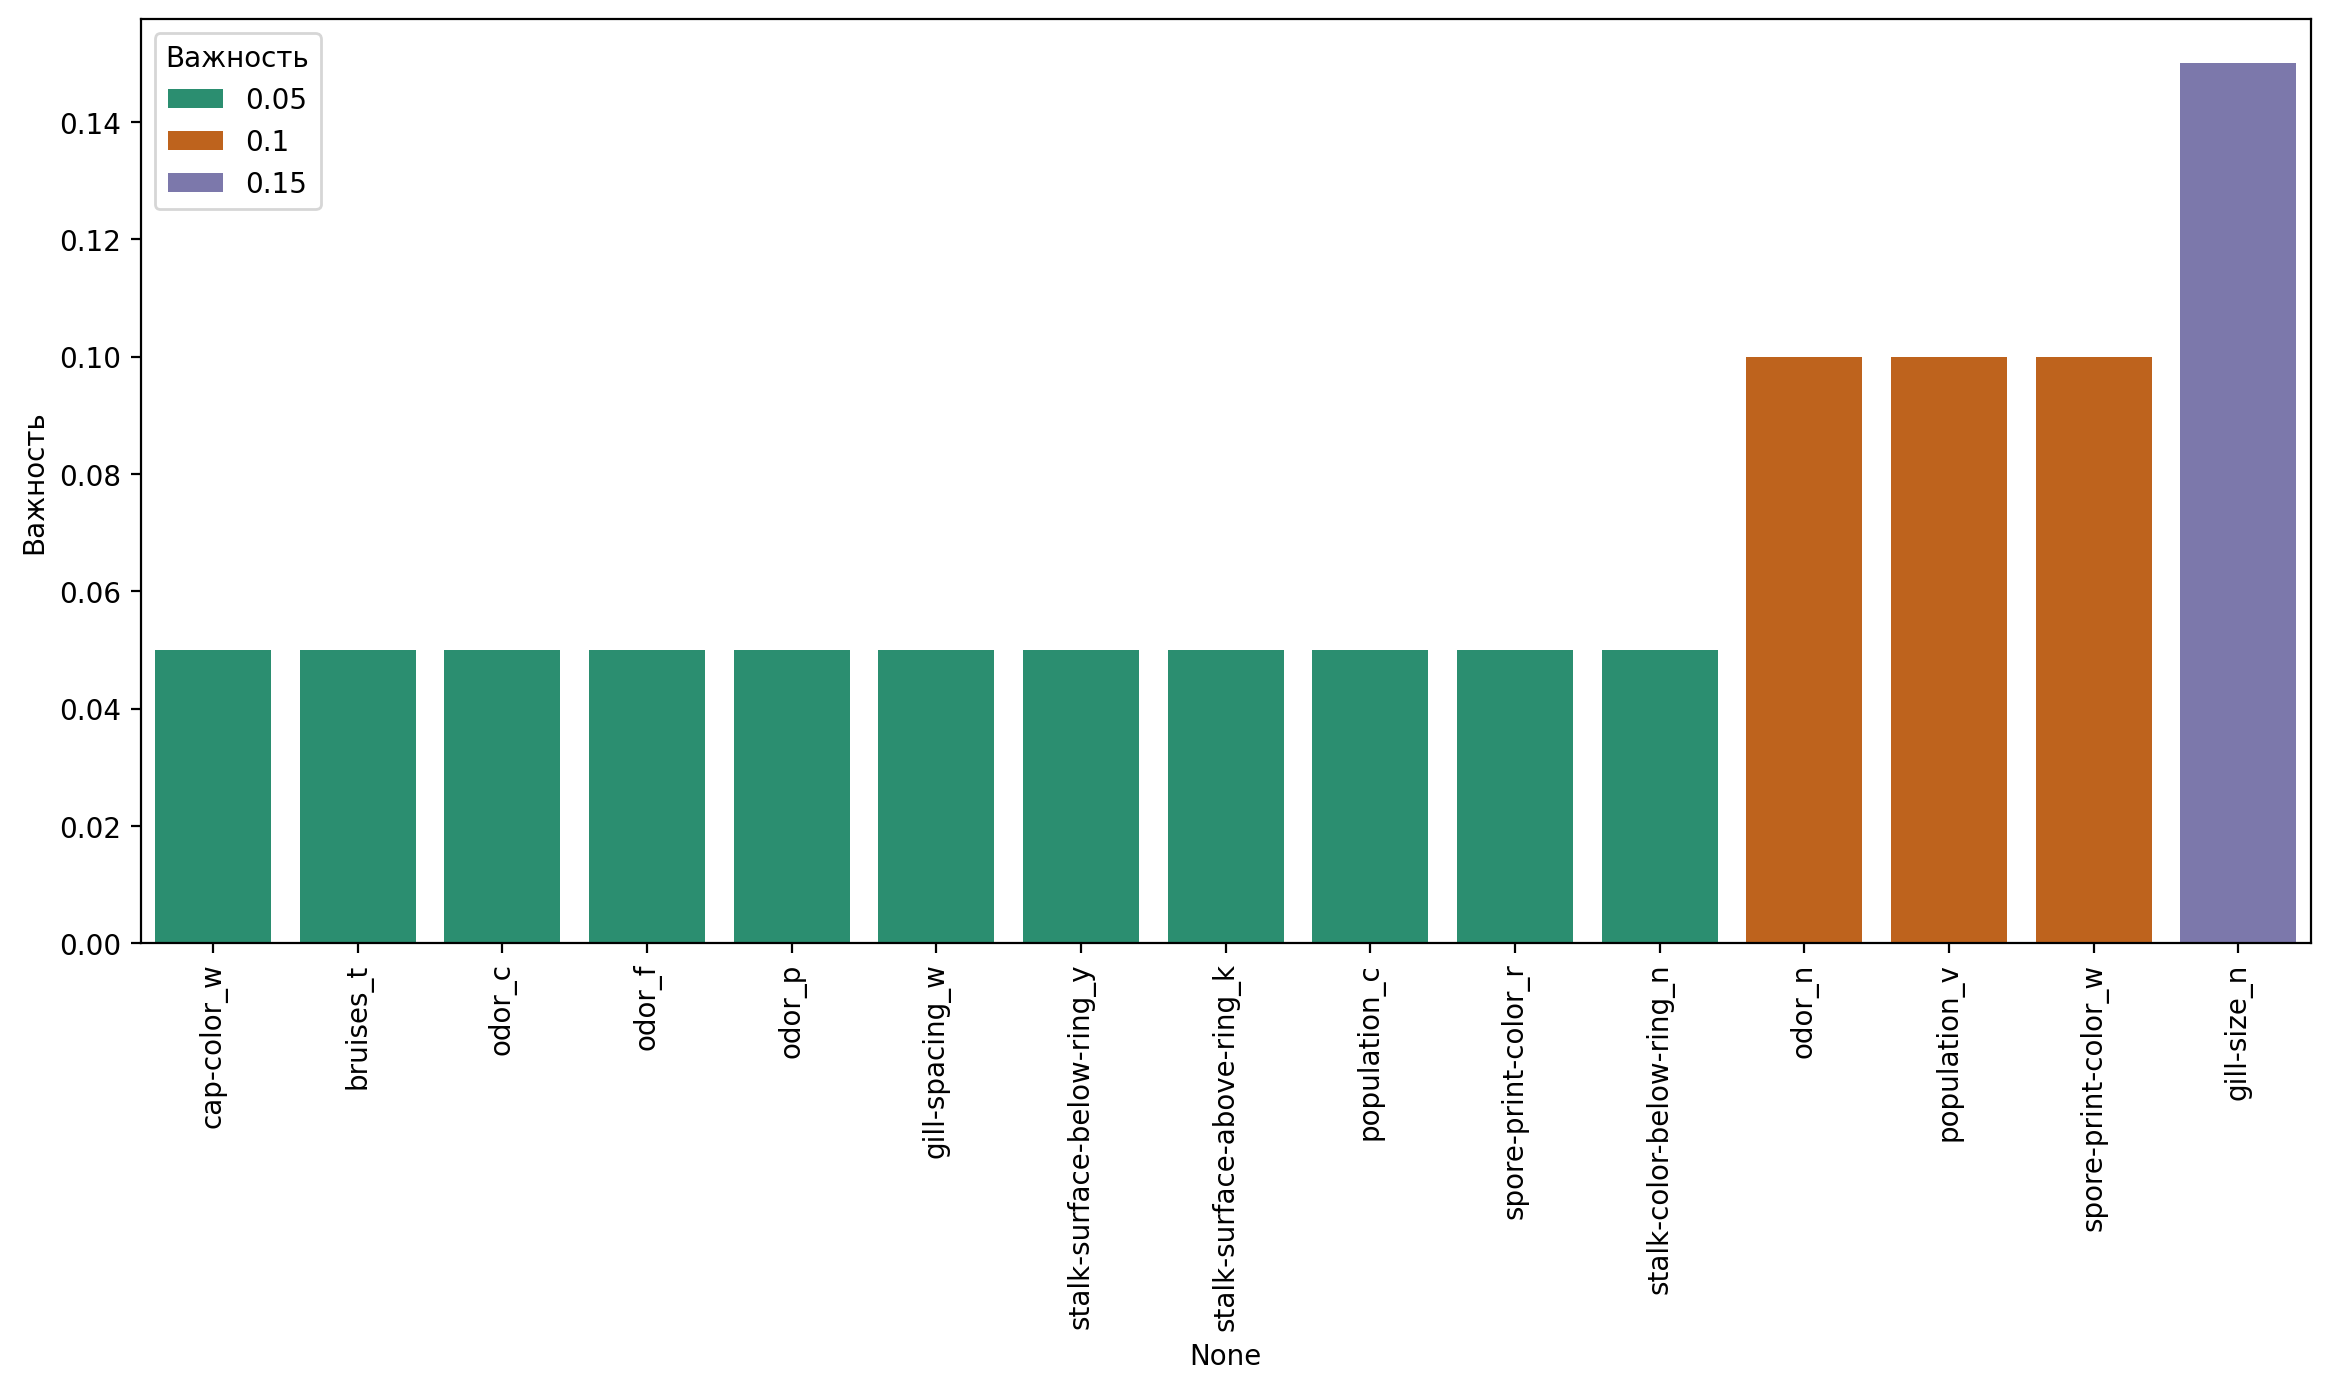

In [69]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Важность', hue='Важность', palette='Dark2')
plt.xticks(rotation=90);

In [1]:
#Градиентный бустинг

In [5]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
param_grid = {'n_estimators': [50, 100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3, 4, 5]}

In [12]:
gb_model = GradientBoostingClassifier(verbose=2)

In [13]:
grid = GridSearchCV(gb_model, param_grid)

In [14]:
grid.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2063            4.09s
         2           1.0597            2.82s
         3           0.9377            2.25s
         4           0.8345            1.84s
         5           0.7479            1.59s
         6           0.6710            1.42s
         7           0.6058            1.40s
         8           0.5473            1.40s
         9           0.4962            1.34s
        10           0.4509            1.25s
        11           0.4114            1.16s
        12           0.3762            1.14s
        13           0.3439            1.07s
        14           0.3162            1.01s
        15           0.2907            0.98s
        16           0.2674            0.95s
        17           0.2461            0.92s
        18           0.2267            0.89s
        19           0.2107            0.86s
        20           0.1950            0.81s
        21           0.1795            0.77s
        2

GridSearchCV(estimator=GradientBoostingClassifier(verbose=2),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [15]:
y_predict = grid.predict(X_test)

In [16]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50, verbose=2)

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [44]:
feat_imp = grid.best_estimator_.feature_importances_

In [45]:
feat_imp = pd.DataFrame(data=feat_imp, columns=['Важность'], index=X.columns)

In [46]:
feat_imp = feat_imp[feat_imp['Важность'] > 0.01].sort_values('Важность')

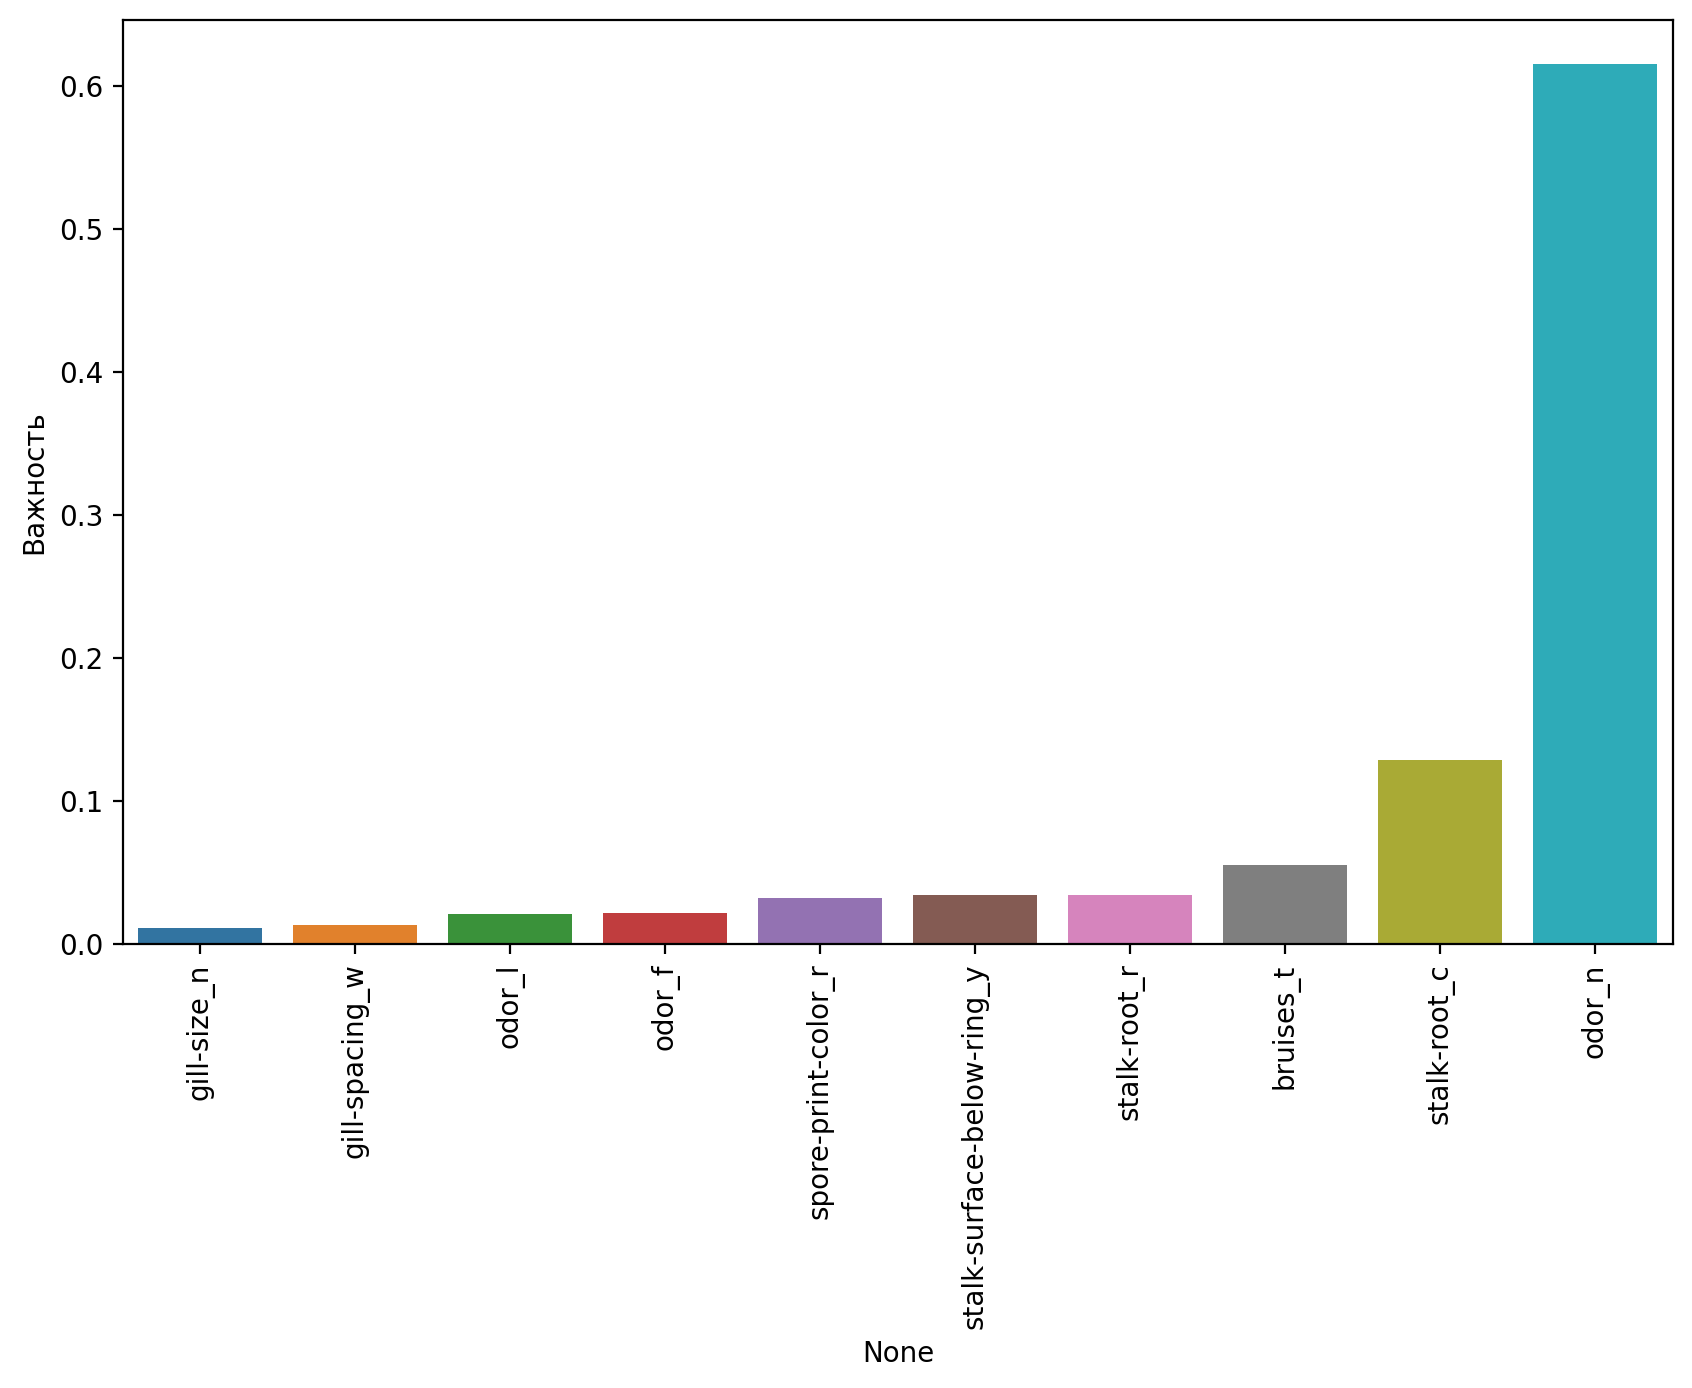

In [47]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=feat_imp, x=feat_imp.index, y='Важность', hue=feat_imp.index)
plt.xticks(rotation=90);